In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\dukuku1\\OneDrive - Louisiana State University\\Documents\\LSU\\Classes\\2nd year\\Spring\\Che 7700\\Project\\ezyzip (1)'

In [2]:
from src.data_preprocess import DataPreprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from hdbscan import HDBSCAN
import pacmap  # PACMAP library for dimensionality reduction

In [3]:
###############################
### 1. Data Preprocessing  ###
###############################

# Load dataset
file_path = "data/Load_data_new.csv"
preprocessor = DataPreprocessing()

data = preprocessor.load_data(file_path)

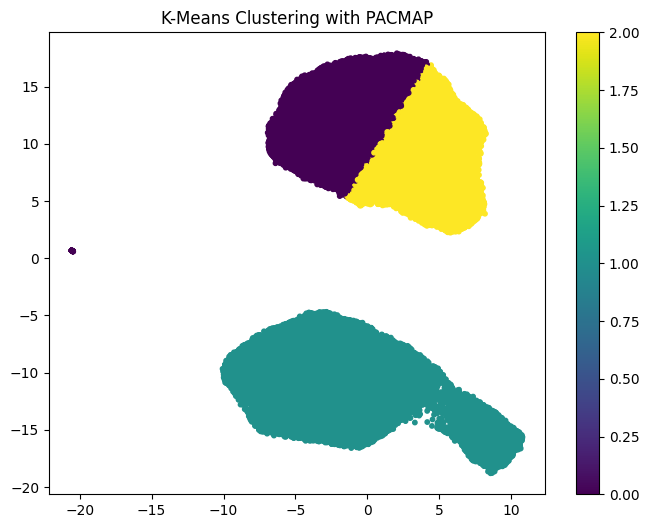

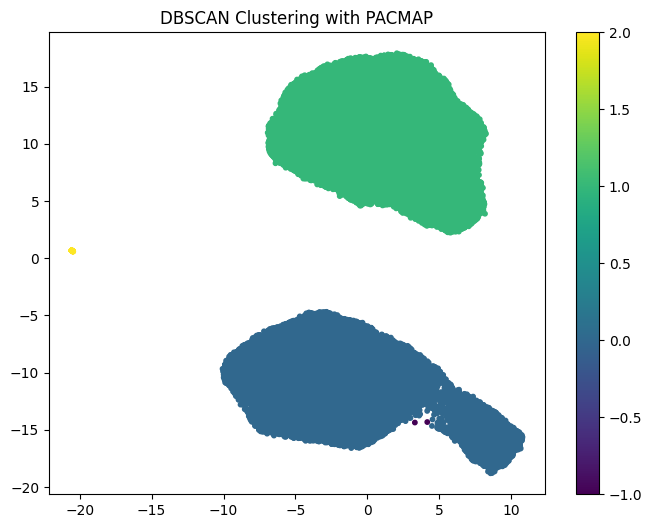

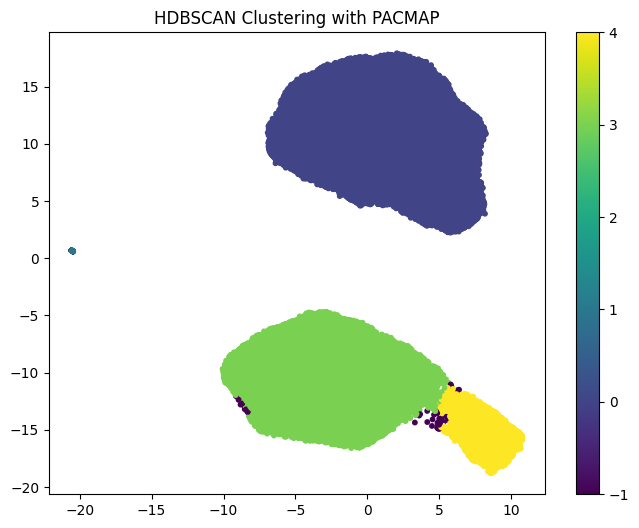

In [4]:
#################################
### 2. Feature Scaling        ###
#################################
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#################################
### 3. PACMAP Dimensionality Reduction ###
#################################

# Initialize PACMAP model
pacmap_model = pacmap.PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0)
data_pacmap = pacmap_model.fit_transform(data_scaled)

#################################
### 4. Clustering Algorithms  ###
#################################

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pacmap)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(data_pacmap)

# HDBSCAN Clustering
hdbscan = HDBSCAN(min_cluster_size=20)
hdbscan_labels = hdbscan.fit_predict(data_pacmap)

#################################
### 5. Visualization          ###
#################################
save_path = 'plots' 
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
    plt.colorbar(scatter)
    plt.title(title)
    plt.savefig(os.path.join(save_path, title + ".png"))

    plt.show()

plot_clusters(data_pacmap, kmeans_labels, "K-Means Clustering with PACMAP")
plot_clusters(data_pacmap, dbscan_labels, "DBSCAN Clustering with PACMAP")
plot_clusters(data_pacmap, hdbscan_labels, "HDBSCAN Clustering with PACMAP")
